In [181]:
#Importing the libraries
import os
import pandapower as pp
from pandapower.converter import from_cim as cim2pp
import pandapower.plotting.plotly as plotly
import plotly.graph_objects as go

In [182]:
# Loading CGMES Files

folder_path = os.path.join(os.getcwd())
# cgmes_files is a list containing paths to both files needed for the CIM converter:
cgmes_files = [os.path.join(folder_path, 'CGMES_v2.4.15_SmallGridTestConfiguration_Boundary_v3.0.0.zip'),
               os.path.join(folder_path, 'CGMES_v2.4.15_SmallGridTestConfiguration_BaseCase_Complete_v3.0.0.zip')]

for f in cgmes_files:
    if not os.path.exists(f):
        raise UserWarning(f"Wrong path specified for the CGMES file {f}")

net = cim2pp.from_cim(file_list=cgmes_files, use_GL_or_DL_profile='DL')

print('Conversion successful')


d:\python\lib\site-packages\pandapower\converter\cim\cim2pp\build_pp_net.py:1919: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

d:\python\lib\site-packages\pandapower\converter\cim\cim2pp\build_pp_net.py:1919: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

d:\python\lib\site-packages\pandapower\converter\cim\cim2pp\build_pp_net.py:1919: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

d:\python\lib\site-packages\pandapower\converter\cim\cim2pp\build_pp_net.py:1659: FutureWarning:

Setting an item o

Conversion successful


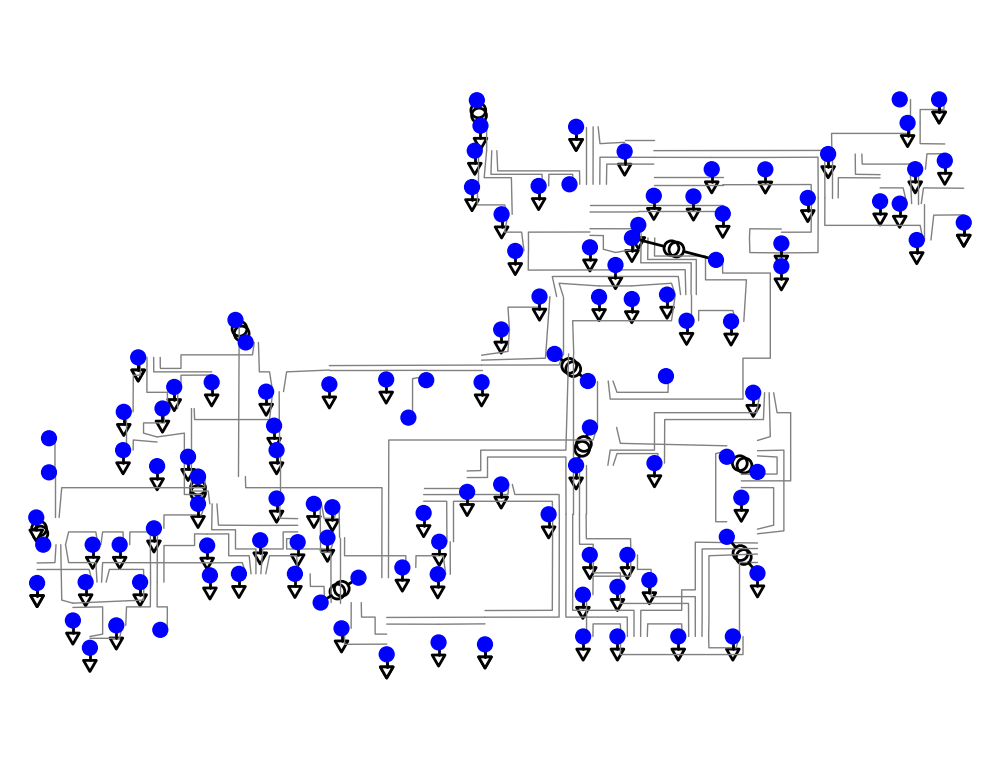

<Axes: >

In [183]:
# Plotting the network Diagram
pp.plotting.simple_plot(net, plot_loads=True, plot_sgens=True, plot_line_switches=True, scale_size=True)

In [189]:
# Interactive Figure
fig = go.Figure()

# Plot nodes with names
fig.add_trace(go.Scatter(
    x=net.bus_geodata.x,
    y=net.bus_geodata.y,
    mode='markers',
    marker=dict(size=10, color='red'),
    text=net.bus['name']  # Use the 'name' column for text
))

# Plot lines
for _, line in net.line.iterrows():
    from_bus = net.bus_geodata.loc[line.from_bus]
    to_bus = net.bus_geodata.loc[line.to_bus]
    fig.add_trace(go.Scatter(
        x=[from_bus.x, to_bus.x],
        y=[from_bus.y, to_bus.y],
        mode='lines',
        line=dict(color='blue', width=2),
    ))

# Update layout for better visibility of names
fig.update_layout(annotations=[
    go.layout.Annotation(
        x=x,
        y=y,
        xref="x",
        yref="y",
        text=name,
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40
    ) for x, y, name in zip(net.bus_geodata.x, net.bus_geodata.y, net.bus['name'])
])

# Show the interactive plot
fig.show()

<Axes: >

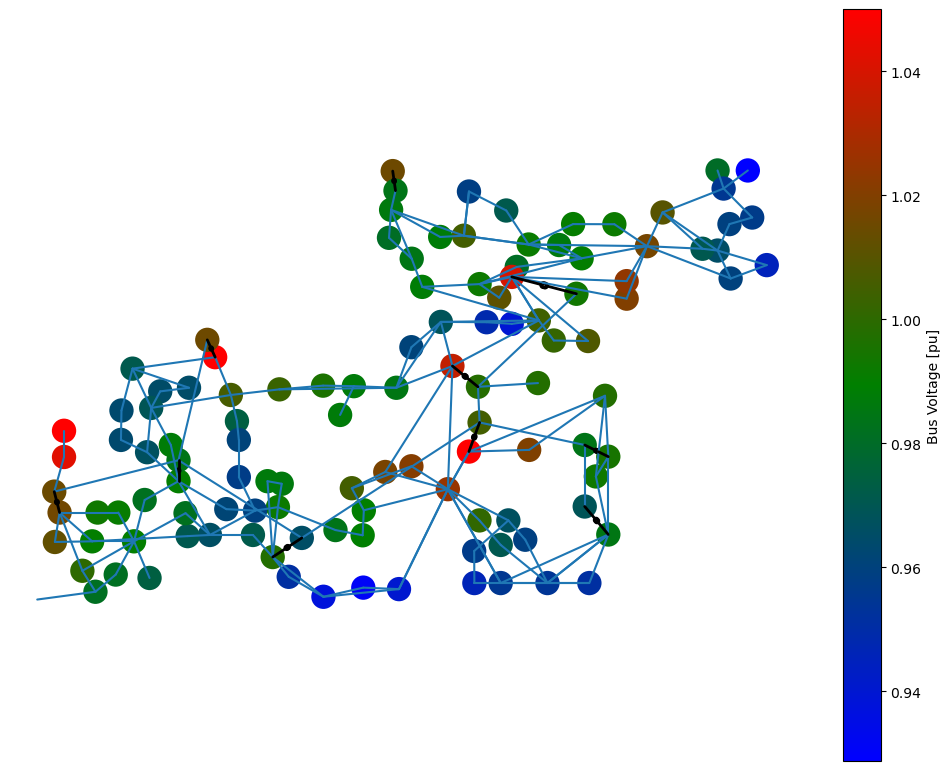

In [188]:

import pandapower.plotting as plt
import pandapower.plotting.colormaps as cmaps

cmap_list = [(0.9, "blue"), (1.0, "green"), (1.1, "red")]
cmap, norm = cmaps.cmap_continuous(cmap_list)

bc = plt.create_bus_collection(net,net.bus.index.values,cmap=cmap)
lc = plt.create_line_collection(net,net.line.index.values,use_bus_geodata=True)
tc = plt.create_trafo_collection(net,net.trafo.index.values)
plt.draw_collections([bc,lc,tc])

In [192]:
ext_grid = pp.create_ext_grid(net, bus=0, vm_pu=1.0, va_degree=0.0)


existing_bus_index = pp.create_bus(net, vn_kv=0.4, name="Riverside", geodata=(23.91534, 3.201058), type="b")
new_bus = pp.create_bus(net, vn_kv=0.4, name="New_Bus", geodata=(0, 0), type="b")


new_line = pp.create_line(net, from_bus=existing_bus_index, to_bus=new_bus, length_km=2, std_type="NAYY 4x50 SE")

new_gen = pp.create_gen(net, bus=new_bus, p_mw=10, vm_pu=1.0, name="New_Generator")

pp.runpp(net)


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [194]:
# External Grid
pp.create_ext_grid(net, bus=new_bus, vm_pu=1.0, name="New_Ext_Grid")

# DC power flow
pp.run.rundcpp(net, trafo_model='t', trafo_loading='current', recycle=None, check_connectivity=True, switch_rx_ratio=2, trafo3w_losses='hv')

#  DC power flow results 
dc_results = net.res_bus
bus_names = net.bus['name']

for bus_index, result in dc_results.iterrows():
    bus_name = bus_names[bus_index]
    print(f"Bus {bus_name}:")
    print(result)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



Bus HickryCk:
vm_pu         1.000000
va_degree     0.000000
p_mw        -87.116558
q_mvar        2.133791
Name: 0, dtype: float64
Bus TannrsCk1:
vm_pu          1.050000
va_degree      8.512847
p_mw        -220.000000
q_mvar       -38.963384
Name: 1, dtype: float64
Bus WHuntngd:
vm_pu         1.000000
va_degree    -6.944313
p_mw         33.000000
q_mvar       15.000000
Name: 2, dtype: float64
Bus Pokagon:
vm_pu         1.000000
va_degree    -2.650689
p_mw         20.000000
q_mvar        9.000000
Name: 3, dtype: float64
Bus FtWayne:
vm_pu         1.000000
va_degree    -7.078149
p_mw         90.000000
q_mvar       30.000000
Name: 4, dtype: float64
Bus DeerCrk:
vm_pu         0.967000
va_degree    -6.399717
p_mw         36.000000
q_mvar       -0.868131
Name: 5, dtype: float64
Bus W.Kammer:
vm_pu          0.995000
va_degree     -2.500025
p_mw        -160.000000
q_mvar        39.381768
Name: 6, dtype: float64
Bus Sterling:
vm_pu         1.00000
va_degree   -10.17112
p_mw         31.00000
q_mv

In [195]:
# AC Power FLow
pp.runpp(net)

ac_power_flow_results = net.res_bus
bus_names = net.bus['name']

for bus_index, result in ac_power_flow_results.iterrows():
    bus_name = bus_names[bus_index]
    print(f"Bus {bus_name}:")
    print(result)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



Bus HickryCk:
vm_pu          1.000000
va_degree      0.000000
p_mw        -114.616637
q_mvar         2.133791
Name: 0, dtype: float64
Bus TannrsCk1:
vm_pu          1.050000
va_degree      6.663854
p_mw        -220.000000
q_mvar       -38.963384
Name: 1, dtype: float64
Bus WHuntngd:
vm_pu         0.948229
va_degree    -7.032696
p_mw         33.000000
q_mvar       15.000000
Name: 2, dtype: float64
Bus Pokagon:
vm_pu         0.981657
va_degree    -3.128749
p_mw         20.000000
q_mvar        9.000000
Name: 3, dtype: float64
Bus FtWayne:
vm_pu         0.965958
va_degree    -8.434054
p_mw         90.000000
q_mvar       30.000000
Name: 4, dtype: float64
Bus DeerCrk:
vm_pu         0.967000
va_degree    -7.900508
p_mw         36.000000
q_mvar       -0.868131
Name: 5, dtype: float64
Bus W.Kammer:
vm_pu          0.995000
va_degree     -3.513496
p_mw        -160.000000
q_mvar        39.381768
Name: 6, dtype: float64
Bus Sterling:
vm_pu         0.986167
va_degree   -11.983427
p_mw         31.0000